# Proyek Analisis Data: [E-Commerce Public Dataset]
- **Nama:** [Danang Agung Restu Aji]
- **Email:** [Danangrestuaji@gmail.com]
- **ID Dicoding:** [profdara]

## Menentukan Pertanyaan Bisnis

- Produk apa yang paling banyak dibeli pelanggan?
- Kapan waktu penjualan tertinggi terjadi?
- Kota mana yang memiliki volume transaksi tertinggi?
- Berapa rata-rata waktu pengiriman dari pembelian ke penerimaan?

## Import Semua Packages/Library yang Digunakan

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import zscore

## Data Wrangling

### Gathering Data

In [22]:
# lokasi url dataset pelanggan
customer_path = 'https://raw.githubusercontent.com/ProfDARA/Proyek_Analisis_Data/refs/heads/master/E-commerce-public-dataset/E-Commerce%20Public%20Dataset/customers_dataset.csv'

# memasukan dataset ke dalam variabel
customer = pd.read_csv(customer_path)

# bagian menampilkan dataset
customer

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


In [23]:
# lokasi url dataset geolokasi
geolocation_path = 'https://raw.githubusercontent.com/ProfDARA/Proyek_Analisis_Data/refs/heads/master/E-commerce-public-dataset/E-Commerce%20Public%20Dataset/geolocation_dataset.csv'

# memasukan dataset ke dalam variabel
geolocation = pd.read_csv(geolocation_path)

# bagian menampilkan dataset
geolocation

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
...,...,...,...,...,...
1000158,99950,-28.068639,-52.010705,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS
1000161,99980,-28.388932,-51.846871,david canabarro,RS


In [24]:
# lokasi url dataset order itemnya
order_items_path = 'https://raw.githubusercontent.com/ProfDARA/Proyek_Analisis_Data/refs/heads/master/E-commerce-public-dataset/E-Commerce%20Public%20Dataset/order_items_dataset.csv'

# memasukan dataset ke dalam variabel
order_items = pd.read_csv(order_items_path)

# bagian menampilkan dataset
order_items

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [25]:
# lokasi file dataset order payments
order_payments_path = 'https://raw.githubusercontent.com/ProfDARA/Proyek_Analisis_Data/refs/heads/master/E-commerce-public-dataset/E-Commerce%20Public%20Dataset/order_items_dataset.csv'

# memasukkan dataset ke dalam variabel
order_payments = pd.read_csv(order_payments_path)

# menampilkan dataset
order_payments


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [26]:
# lokasi file dataset order review
order_reviews_path = 'https://raw.githubusercontent.com/ProfDARA/Proyek_Analisis_Data/refs/heads/master/E-commerce-public-dataset/E-Commerce%20Public%20Dataset/order_reviews_dataset.csv'

#  memasukkan dataset ke dalam variabel
order_reviews = pd.read_csv(order_reviews_path)

# menampilkan dataset
order_reviews

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


In [27]:
# lokasi file dataset orders
orders_path = 'https://raw.githubusercontent.com/ProfDARA/Proyek_Analisis_Data/refs/heads/master/E-commerce-public-dataset/E-Commerce%20Public%20Dataset/orders_dataset.csv'

# memasukkan dataset ke dalam variabel
orders = pd.read_csv(orders_path)

# menampilkan dataset
orders


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [28]:
# lokasi file dataset product category name translation
product_category_translation_path = 'https://raw.githubusercontent.com/ProfDARA/Proyek_Analisis_Data/refs/heads/master/E-commerce-public-dataset/E-Commerce%20Public%20Dataset/product_category_name_translation.csv'

# memasukkan dataset ke dalam variabel
product_category_translation = pd.read_csv(product_category_translation_path)

# menampilkan dataset
product_category_translation

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor
...,...,...
66,flores,flowers
67,artes_e_artesanato,arts_and_craftmanship
68,fraldas_higiene,diapers_and_hygiene
69,fashion_roupa_infanto_juvenil,fashion_childrens_clothes


In [29]:
# lokasi file dataset products
products_path = 'https://raw.githubusercontent.com/ProfDARA/Proyek_Analisis_Data/refs/heads/master/E-commerce-public-dataset/E-Commerce%20Public%20Dataset/products_dataset.csv'

# memasukkan dataset ke dalam variabel
products = pd.read_csv(products_path)

# menampilkan dataset
products

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


In [30]:
# Menentukan lokasi file dataset sellers
sellers_path = 'https://raw.githubusercontent.com/ProfDARA/Proyek_Analisis_Data/refs/heads/master/E-commerce-public-dataset/E-Commerce%20Public%20Dataset/products_dataset.csv'

# Memasukkan dataset ke dalam variabel
sellers = pd.read_csv(sellers_path)

# Menampilkan dataset
sellers

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


**Insight:**

customers_dataset.csv berisi Profil pelanggan.
- info pelanggan: ID unik, kota, dan provinsi. 
- customer_id bisa berulang untuk customer_unique_id, menandakan pelanggan bisa memiliki beberapa transaksi/order.
- Berguna untuk menganalisis distribusi pelanggan per lokasi (customer_city, customer_state).
- ID pelanggan tidak unik terhadap kota, berarti beberapa kota bisa memiliki banyak pelanggan. Dapat dianalisis distribusi pelanggan per kota dan negara bagian.


geolocation_dataset.csv berisi Koordinat lokasi (tidak hanya pelanggan).
- Berisi koordinat (latitude, longitude) per kode pos.
- Bukan hanya untuk pelanggan, tapi semua entitas (penjual juga bisa muncul).
- Bisa digunakan untuk menghitung jarak fisik antara penjual dan pembeli, atau memetakan distribusi geografis.
- Termasuk titik koordinat (lat/lng), digunakan untuk menghitung jarak penjual-pelanggan atau distribusi spasial.


order_items_dataset.csv berisi Detail item per order (multi-row per order).
- Setiap baris = satu produk dalam satu pesanan (1 pesanan bisa punya banyak baris).
- Memuat product_id, seller_id, harga (price) dan ongkir (freight_value), serta batas pengiriman (shipping_limit_date).
- Data penting untuk menghitung: total item per order, penjual paling aktif, dan nilai order.
- Beberapa order memiliki lebih dari 1 produk (order_id tidak unik). Dapat dianalisis keranjang rata-rata & produk populer.


order_payments_dataset.csv berisi Metode & jumlah pembayaran. Dapat menunjukkan metode pembayaran populer & distribusi jumlah pembayaran.
- Satu order bisa memiliki beberapa metode pembayaran (tapi biasanya 1).
- Menyediakan jenis pembayaran (payment_type), jumlah pembayaran, dan cicilan (payment_installments).
- Bisa digunakan untuk analisis preferensi pembayaran dan korelasi antara metode pembayaran dan nilai pembelian.

order_reviews_dataset.csv berisi Ulasan dan rating.
Rating (1-5), review headline dan komentar. 
- Review pelanggan: nilai rating (review_score) + komentar.
- Banyak nilai NaN pada review_comment_message, berarti tidak semua memberikan komentar tertulis.
- Cocok untuk analisis sentimen dan korelasi antara pengalaman dan keterlambatan pengiriman.

orders_dataset.csv berisi Status, tanggal order, pengiriman.
-Informasi lengkap alur transaksi: waktu beli, disetujui, dikirim, diterima.
-Lama pemrosesan (order_approved_at - order_purchase_timestamp)
- Lama pengiriman (order_delivered_customer_date - order_delivered_carrier_date)
- Keterlambatan (order_estimated_delivery_date vs order_delivered_customer_date)
- Bisa untuk analisis durasi pengiriman dan analisis keterlambatan.

product_category_name_translation.csv berisi Penerjemahan kategori produk.
- Kamus terjemahan dari product_category_name (Portugis) ke Inggris.
- Digunakan untuk interpretasi dan visualisasi kategori produk dengan lebih mudah.
- Konversi kategori produk dari Portugis ke Inggris. Penting untuk visualisasi dan interpretasi.


products_dataset.csv berisi Informasi produk, termasuk dimensi.
bisa digunakan untuk menghitung volume atau hubungan dengan biaya pengiriman.
- Info produk: dimensi, berat, jumlah foto.
- Analisis hubungan antara ukuran produk dan ongkir (freight_value)


sellers_dataset.csv berisi Data penjual dan lokasi.
- Info penjual: ID, kota, dan provinsi.
Bisa digunakan untuk melihat distribusi penjual secara geografis.

### Assessing Data

In [31]:
customer.info()

# Menampilkan jumlah nilai kosong di setiap kolom
print("Jumlah nilai kosong dalam setiap kolom pada dataset customer:")
print(customer.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
Jumlah nilai kosong dalam setiap kolom pada dataset customer:
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64


In [32]:
# untuk menampilkan display DataFrame sederhana
print("Basic info datasetnya :")
print(customer.info())

# descriptive statistik untuk kolom
print("\n Descriptive statistics untuk kolom numerik:")
print(customer.describe())

Basic info datasetnya :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
None

 Descriptive statistics untuk kolom numerik:
       customer_zip_code_prefix
count              99441.000000
mean               35137.474583
std                29797.938996
min                 1003.000000
25%                11347.000000
50%                24416.000000
75%                58900.000000
max                99990.000000


In [33]:
geolocation.info()

# untuk melihat berapa bagian unik tiap kolom
print("Jumlah entri untuk setiap kolom dalam data geolocation:")
geolocation.nunique()

# Menampilkan jumlah nilai kosong di setiap kolom
print("Jumlah nilai kosong dalam setiap kolom pada dataset geolocation:")
print(geolocation.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB
Jumlah entri untuk setiap kolom dalam data geolocation:
Jumlah nilai kosong dalam setiap kolom pada dataset geolocation:
geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64


Jumlah outlier berdasarkan Z-score: 31084
        geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
345301                        14915        -1.888416       -55.121428   
387565                        18243        28.008978       -15.536867   
399300                        19274       -10.893066       -61.932123   
513631                        28165        41.614052        -8.411675   
513640                        28145        -8.741506       -63.907933   

               geolocation_city geolocation_state  zscore_lat  zscore_lng  
345301                   curupa                SP    3.374422   -2.044826  
387565  bom retiro da esperanca                SP    8.605022    7.226114  
399300                primavera                SP    1.799044   -3.639931  
513631      vila nova de campos                RJ   10.985253    8.894877  
513640  sao sebastiao de campos                RJ    2.175463   -4.102678  


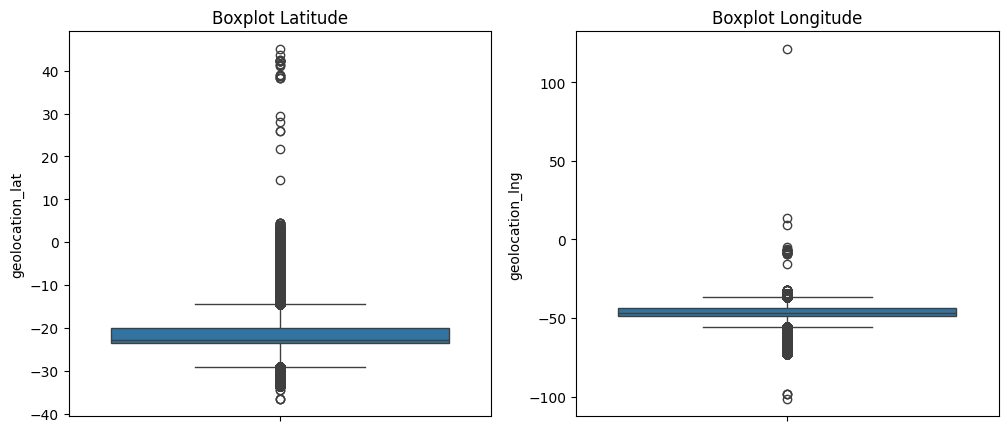

In [34]:
# Menghitung Z-score untuk latitude dan longitude
geolocation['zscore_lat'] = zscore(geolocation['geolocation_lat'])
geolocation['zscore_lng'] = zscore(geolocation['geolocation_lng'])

# Menentukan threshold (biasanya 3 atau -3)
outliers_z = geolocation[
    (geolocation['zscore_lat'].abs() > 3) | (geolocation['zscore_lng'].abs() > 3)
]
print(f"Jumlah outlier berdasarkan Z-score: {len(outliers_z)}")
print(outliers_z.head())

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 5))

# Boxplot untuk latitude
plt.subplot(1, 2, 1)
sns.boxplot(y=geolocation['geolocation_lat'])
plt.title('Boxplot Latitude')

# Boxplot untuk longitude
plt.subplot(1, 2, 2)
sns.boxplot(y=geolocation['geolocation_lng'])
plt.title('Boxplot Longitude')

plt.show()

In [35]:
orders.info()

# untuk melihat berapa bagian unik tiap kolom
print("Jumlah entri untuk setiap kolom dalam data orders:")
orders.nunique()

# Menampilkan jumlah nilai kosong di setiap kolom
print("Jumlah nilai kosong dalam setiap kolom pada dataset orders:")
print(orders.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB
Jumlah entri untuk setiap kolom dalam data orders:
Jumlah nilai kosong dalam setiap kolom pada dataset orders:
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0

**Insight:**
- Jumlah data: 99.441 baris menunjukkan jumlah pelanggan yang besar.
- Tidak ada Nulls pada dataset customer, karena customer_id unik
- data menunjukkan bahwa ada 31.084 outlier dalam dataset geolocation berdasarkan Z-score. Outlier ini mencakup titik lokasi dengan latitude atau longitude yang memiliki Z-score lebih dari 3 atau kurang dari -3, yang berarti jauh dari distribusi normal data.
- Dataset orders berisi 99.441 entri, merepresentasikan pesanan pelanggan dengan informasi tentang status pesanan dan waktu pemrosesan. Semua kolom memiliki jumlah non-null yang sama, berarti tidak ada nilai kosong, sehingga data siap untuk analisis.


### Cleaning Data

In [36]:
# bagian ini dipakai untuk mencari dan clean missing value
def clean_dataframe(df, name):
    print(f"\n--- {name} ---")
    print("Shape:", df.shape)
    print("Missing values:\n", df.isnull().sum())
    df = df.drop_duplicates()
    df.columns = [col.strip().lower().replace(" ", "_") for col in df.columns]
    return df

customer = clean_dataframe(customer, "Customer")
geolocation = clean_dataframe(geolocation, "Geolocation")
order_items = clean_dataframe(order_items, "Order Items")


--- Customer ---
Shape: (99441, 5)
Missing values:
 customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

--- Geolocation ---
Shape: (1000163, 7)
Missing values:
 geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
zscore_lat                     0
zscore_lng                     0
dtype: int64

--- Order Items ---
Shape: (112650, 7)
Missing values:
 order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64


In [37]:
# dipakai untuk drop kolom yang tidak relevan (contoh: zip_code_prefix yang terduplikat)
if 'geolocation_zip_code_prefix' in geolocation.columns:
    geolocation = geolocation.drop_duplicates(subset=['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng'])
    print(f"Jumlah data setelah menghapus duplikat: {len(geolocation)}")

# filter lat/lon outliers
geolocation = geolocation[(geolocation['geolocation_lat'].between(-90, 90)) &
                          (geolocation['geolocation_lng'].between(-180, 180))]
print(f"Jumlah data setelah filter outlier: {len(geolocation)}") 

Jumlah data setelah menghapus duplikat: 720154
Jumlah data setelah filter outlier: 720154


Jumlah data sebelum pembersihan: 720154
Jumlah data setelah pembersihan: 589598


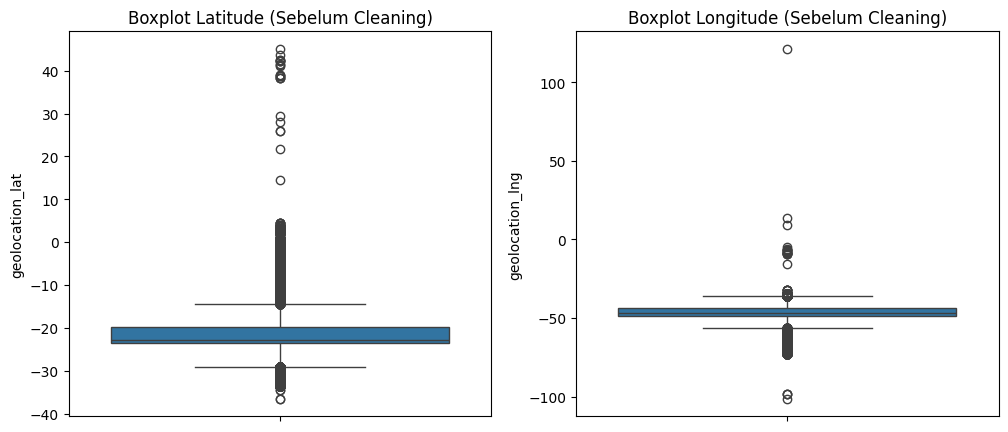

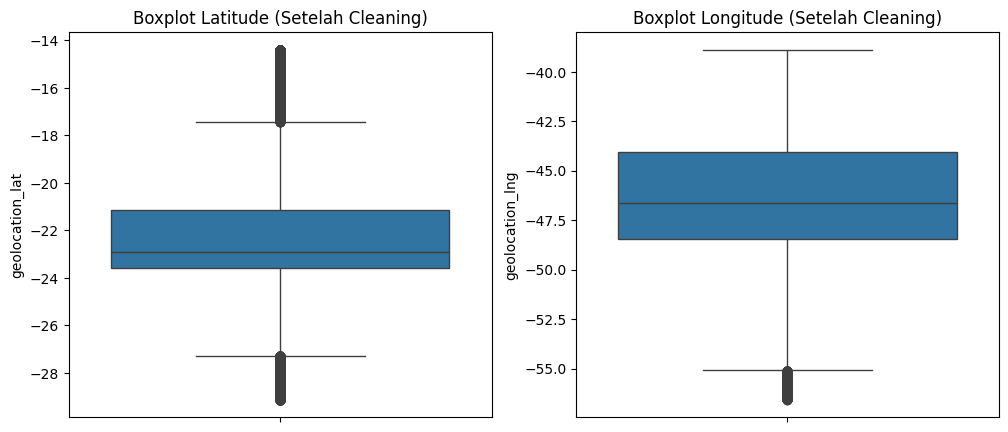

In [38]:
# Kalkulasi lower dan upper bounds untuk latitude and longitude menggunakan IQR
Q1_lat = geolocation['geolocation_lat'].quantile(0.25)
Q3_lat = geolocation['geolocation_lat'].quantile(0.75)
IQR_lat = Q3_lat - Q1_lat
lower_bound_lat = Q1_lat - 1.5 * IQR_lat
upper_bound_lat = Q3_lat + 1.5 * IQR_lat

Q1_lng = geolocation['geolocation_lng'].quantile(0.25)
Q3_lng = geolocation['geolocation_lng'].quantile(0.75)
IQR_lng = Q3_lng - Q1_lng
lower_bound_lng = Q1_lng - 1.5 * IQR_lng
upper_bound_lng = Q3_lng + 1.5 * IQR_lng

# Pada variabel geolocation_clean, perlu dipastikan bahwa lower_bound_lat, upper_bound_lat, lower_bound_lng, dan upper_bound_lng sudah dihitung sebelumnya menggunakan metode Interquartile Range (IQR) atau Z-score.
geolocation_clean = geolocation[
    (geolocation['geolocation_lat'].between(lower_bound_lat, upper_bound_lat)) &
    (geolocation['geolocation_lng'].between(lower_bound_lng, upper_bound_lng))
]

print(f"Jumlah data sebelum pembersihan: {len(geolocation)}")
print(f"Jumlah data setelah pembersihan: {len(geolocation_clean)}")

# Box plot sebelum cleaning
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(y=geolocation['geolocation_lat'])
plt.title('Boxplot Latitude (Sebelum Cleaning)')
plt.subplot(1, 2, 2)
sns.boxplot(y=geolocation['geolocation_lng'])
plt.title('Boxplot Longitude (Sebelum Cleaning)')
plt.show()

# Box plot setelah cleaning
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(y=geolocation_clean['geolocation_lat'])
plt.title('Boxplot Latitude (Setelah Cleaning)')
plt.subplot(1, 2, 2)
sns.boxplot(y=geolocation_clean['geolocation_lng'])
plt.title('Boxplot Longitude (Setelah Cleaning)')
plt.show()


In [39]:
# Konversi kolom waktu & interpolasi
for col in ["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date",
            "order_delivered_customer_date", "order_estimated_delivery_date"]:
    if col in orders.columns:  
        orders[col] = pd.to_datetime(orders[col], errors='coerce')  
        print(f"Konversi kolom {col} selesai. Tipe data sekarang: {orders[col].dtype}")  

# Menampilkan contoh data setelah konversi
print("\n Contoh data setelah konversi waktu:")
print(orders[["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date",
             "order_delivered_customer_date", "order_estimated_delivery_date"]].head())  

Konversi kolom order_purchase_timestamp selesai. Tipe data sekarang: datetime64[ns]
Konversi kolom order_approved_at selesai. Tipe data sekarang: datetime64[ns]
Konversi kolom order_delivered_carrier_date selesai. Tipe data sekarang: datetime64[ns]
Konversi kolom order_delivered_customer_date selesai. Tipe data sekarang: datetime64[ns]
Konversi kolom order_estimated_delivery_date selesai. Tipe data sekarang: datetime64[ns]

 Contoh data setelah konversi waktu:
  order_purchase_timestamp   order_approved_at order_delivered_carrier_date  \
0      2017-10-02 10:56:33 2017-10-02 11:07:15          2017-10-04 19:55:00   
1      2018-07-24 20:41:37 2018-07-26 03:24:27          2018-07-26 14:31:00   
2      2018-08-08 08:38:49 2018-08-08 08:55:23          2018-08-08 13:50:00   
3      2017-11-18 19:28:06 2017-11-18 19:45:59          2017-11-22 13:39:59   
4      2018-02-13 21:18:39 2018-02-13 22:20:29          2018-02-14 19:46:34   

  order_delivered_customer_date order_estimated_delivery_dat

In [40]:
# Interpolasi nilai hilang hanya untuk kolom tanggal terkait pengiriman
for col in ["order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date"]:
    if col in orders.columns:  # ubahan df ke orders
        orders[col].interpolate(method="linear", limit_direction="both", inplace=True)  # ubah df ke orders
        print(f"Interpolasi kolom {col} selesai.")

Interpolasi kolom order_approved_at selesai.
Interpolasi kolom order_delivered_carrier_date selesai.
Interpolasi kolom order_delivered_customer_date selesai.


C:\Users\Danang ARA\AppData\Local\Temp\ipykernel_16888\1816080391.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  orders[col].interpolate(method="linear", limit_direction="both", inplace=True)  # ubah df ke orders


**Insight:**

Dataset Customer
- Tidak ada nilai kosong di semua kolom, Untuk dataset yang tidak memiliki missing values, seperti order_items, tidak perlu penanganan lebih lanjut.
- Data siap digunakan untuk join dengan data pesanan lewat customer_id.
- Jika fokus analisis pada pelanggan unik dapat menggunakan customer_unique_id.

Dataset Geolocation
- Jumlah data sangat besar: 1.000.163 baris, kemungkinan menunjukkan banyak duplikasi per kode pos.
- Tidak ada nilai kosong, namun kemungkinan ada banyak entri dengan zip_code_prefix yang sama namun koordinat berbeda.
- Pada geolocation, duplikat dihilangkan berdasarkan kode pos, latitude, dan longitude untuk memastikan hanya satu titik koordinat per kode pos.
- Outlier di geolocation dapat ditangani dengan membatasi latitude dan longitude.
- outlier latitude/longitude telah diidentifikasi dan dihilangkan dengan filter, memastikan data berada pada rentang geografis yang wajar. Visualisasi boxplot menunjukkan perbedaan data sebelum dan sesudah cleaning. Metode cleaning outlier dapat diperbaiki dengan menggunakan IQR atau Z-score.
- Konversi tipe data dan interpolasi dilakukan pada data waktu di kolom orders.

Dataset Order Items
- Tidak ada nilai kosong, semua data harga dan biaya pengiriman lengkap.
- Total item: 112.650 ,kemungkinan satu pesanan berisi lebih dari satu produk.
- Data ini siap untuk analisis pendapatan, biaya kirim, dan distribusi penjual.

## Exploratory Data Analysis (EDA)

### Explore Lokasi Data Pelanggan

In [41]:
# Pengguna berdasar kriteria tertentu
print("\n Jumlah Customer Unik:", customer['customer_unique_id'].nunique())

# Assumsi customer relevan berdasar state/
print("\n Segmentasi Pelanggan:")
print(customer['customer_state'].value_counts())

# Assumsi customer relevan berdasar city
print("\n Distribusi Lokasi Pelanggan:")
print(customer['customer_city'].value_counts())
customer_city.hist()


 Jumlah Customer Unik: 96096

 Segmentasi Pelanggan:
customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: count, dtype: int64

 Distribusi Lokasi Pelanggan:
customer_city
sao paulo                   15540
rio de janeiro               6882
belo horizonte               2773
brasilia                     2131
curitiba                     1521
                            ...  
olhos d'agua                    1
pacotuba                        1
sao sebastiao do paraiba        1
benedito leite                  1
campos verdes                   1
Name: count, Length: 4119, dtype: int64


NameError: name 'customer_city' is not defined

Statistik Deskriptif Jumlah Pesanan per Pelanggan:
count    96096.000000
mean         1.034809
std          0.214384
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         17.000000
Name: order_count, dtype: float64


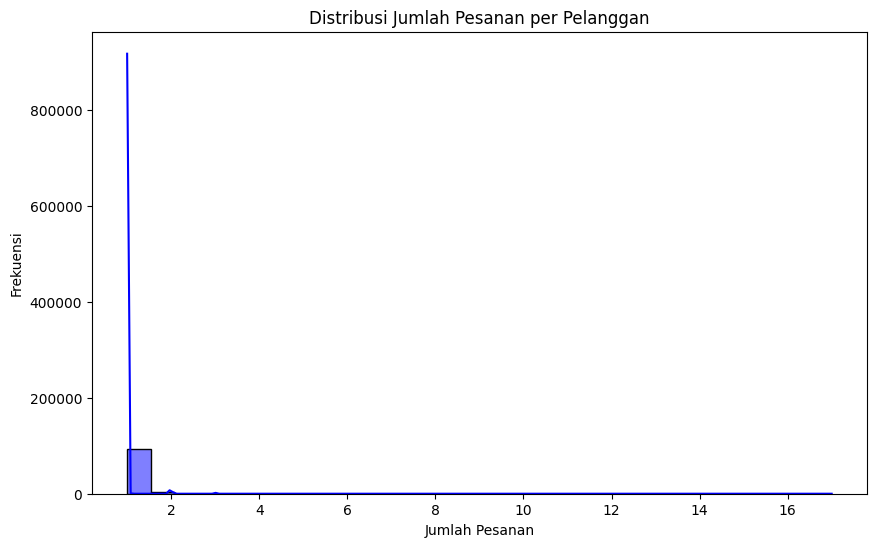

In [ ]:
def check_customer_order_correlation(customer_df, orders_df):
    # Menggabungkan data customer dan orders berdasarkan customer_id
    merged_df = pd.merge(orders_df, customer_df, on='customer_id', how='inner')
    
    # Menghitung jumlah pesanan per pelanggan
    customer_order_count = merged_df.groupby('customer_unique_id')['order_id'].count().reset_index()
    customer_order_count.columns = ['customer_unique_id', 'order_count']
    
    # Menampilkan statistik deskriptif
    print("Statistik Deskriptif Jumlah Pesanan per Pelanggan:")
    print(customer_order_count['order_count'].describe())
    
    return customer_order_count

# Contoh penggunaan fungsi
customer_order_correlation = check_customer_order_correlation(customer, orders)

**Insight:**
- xxx
- xxx

## Visualization & Explanatory Analysis

### Pertanyaan 1:

In [ ]:
# Gabungan dataset yang dibutuhkan
merged_df = pd.merge(orders, order_items, on='order_id', how='left')
merged_df = pd.merge(merged_df, products, on='product_id', how='left')
merged_df = pd.merge(merged_df, order_payments, on='order_id', how='left')
merged_df = pd.merge(merged_df, customer, on='customer_id', how='left')


# 1. Produk apa yang paling banyak dibeli pelanggan?
top_products = merged_df['product_category_name'].value_counts().head(10)
print("Top 10 Produk Terlaris:\n", top_products)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_products.index, y=top_products.values)
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Produk Terlaris')
plt.xlabel('Kategori Produk')
plt.ylabel('Jumlah Pembelian')
plt.show()

### Pertanyaan 2:

In [ ]:
# 2. Kapan waktu penjualan tertinggi terjadi?
merged_df['order_purchase_timestamp'] = pd.to_datetime(merged_df['order_purchase_timestamp'])
merged_df['order_purchase_month'] = merged_df['order_purchase_timestamp'].dt.month
sales_by_month = merged_df['order_purchase_month'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
sns.lineplot(x=sales_by_month.index, y=sales_by_month.values)
plt.title('Penjualan per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Penjualan')
plt.show()

### Pertanyaan 3:

In [ ]:
# 3. Kota mana yang memiliki volume transaksi tertinggi?
city_sales = merged_df.groupby('customer_city')['order_id'].count().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=city_sales.index, y=city_sales.values)
plt.xticks(rotation=90)
plt.title('Top 10 Kota dengan Volume Transaksi Tertinggi')
plt.xlabel('Kota')
plt.ylabel('Jumlah Transaksi')
plt.show()

### Pertanyaan 4:

In [ ]:
# 4. Berapa rata-rata waktu pengiriman dari pembelian ke penerimaan?
merged_df['delivery_time'] = (merged_df['order_delivered_customer_date'] - merged_df['order_purchase_timestamp']).dt.days
avg_delivery_time = merged_df['delivery_time'].mean()
print(f"Rata-rata waktu pengiriman: {avg_delivery_time} hari")

**Insight:**
- xxx
- xxx

## Analisis Lanjutan (Opsional)

In [ ]:
import plotly.express as px

fig = px.scatter_mapbox(geolocation_clean, lat="geolocation_lat", lon="geolocation_lng", zoom=3)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()


## Conclusion

- Conclution pertanyaan 1
- Conclution pertanyaan 2